# Image Processing

Nous disposons de **radiographies de mains** d'enfants en bas âges provenant du RSNA Pediatric Bone Age Challenge 2017 (https://www.rsna.org/education/ai-resources-and-training/ai-image-challenge/rsna-pediatric-bone-age-challenge-2017). Ce challenge avait pour objectif de créer un modèle pouvant prédire, avec le maximum de précision possible, l'âge des enfants à partir de leurs radios.

Notre objectif à nous n'était pas de prédire l'âge des radios mais *d'appliquer certaines notions d'analyse et de traitement des images* à ces radios de mains.


# Import librairies

In [487]:
import os 
import numpy as np
import scipy
import matplotlib.pyplot as plt
import imageio as img
import scipy.stats as stats
from scipy import ndimage as ndi
from PIL import  ImageOps, Image, ImageFilter
import cv2 as cv
from scipy import fftpack
from py_session import py_session
from PIL import  ImageDraw
import  warnings 
warnings.filterwarnings('ignore')


# Version of the modules

In [488]:
py_session()

43 modules found
IPython             	7.18.1                  ipython_genutils    	0.2.0                   pygments            	2.7.1
PIL                 	7.2.0                   jedi                	0.17.2                  pyparsing           	2.4.7
argparse            	1.1                     joblib              	1.0.0                   re                  	2.2.1
backcall            	0.2.0                   json                	2.0.9                   scipy               	1.5.2
cffi                	1.14.3                  jupyter_client      	6.1.7                   six                 	1.15.0
colorama            	0.4.3                   jupyter_core        	4.6.3                   skimage             	0.18.1
ctypes              	1.1.0                   kiwisolver          	1.2.0                   sklearn             	0.24.1
cv2                 	4.5.1                   logging             	0.5.1.2                 threadpoolctl       	2.1.0
cycler              	0.10.0                 

# Chargement des images

Par soucis de simplicité nous avons choisi 4 images à manipuler.

In [486]:
im1= img.imread('1379.png')
im2= img.imread('1380.png')
im3= img.imread('1381.png')
im4= img.imread('1382.png')


In [491]:
print("Dimensions de l'image 1: " , im1.shape )
print("Dimensions de l'image 2: " , im2.shape )
print("Dimensions de l'image 3: " , im3.shape )
print("Dimensions de l'image 4: " , im4.shape )


Dimensions de l'image 1:  (2044, 1514)
Dimensions de l'image 2:  (2044, 1514)
Dimensions de l'image 3:  (2044, 1514)
Dimensions de l'image 4:  (2044, 1514)


Tous les images sont de dimmensions (2044, 1514)

(-0.5, 1513.5, 2043.5, -0.5)

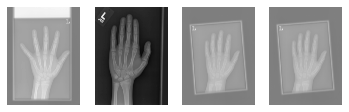

In [229]:
#plot des 4 images

fig, axes = plt.subplots(1, 4)
axes[0].imshow(im1, cmap='gray') 
axes[0].axis('off')
axes[1].imshow(im2 , cmap='gray')
axes[1].axis('off')
axes[2].imshow(im3 , cmap='gray')
axes[2].axis('off')
axes[3].imshow(im3, cmap='gray')
axes[3].axis('off')


<function matplotlib.pyplot.show(close=None, block=None)>

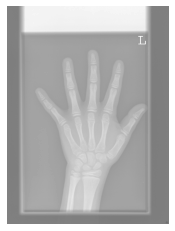

In [492]:
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

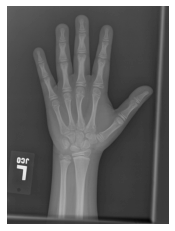

In [231]:
plt.imshow(im4, cmap='gray')
plt.axis('off')
plt.show

# Histogrammes normalisés et cumulés

In [232]:
#histogramme normalisé image 1

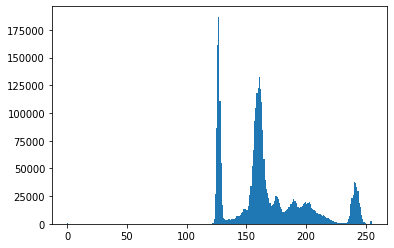

In [233]:
plt.hist(im1.ravel(), bins = 256)
plt.show()

In [234]:
#Histogramme cumulé image 1

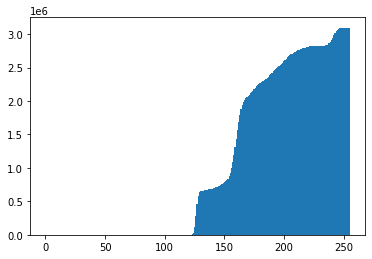

In [235]:
plt.hist(im1.ravel(), bins = 256, cumulative= True)
plt.show()

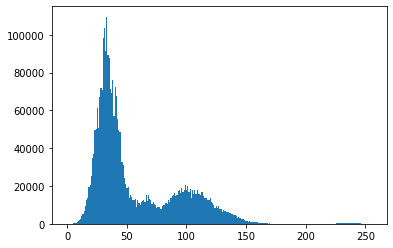

In [236]:
#histogramme normalisé image 2
plt.hist(im2.ravel(), bins = 256)
plt.show()

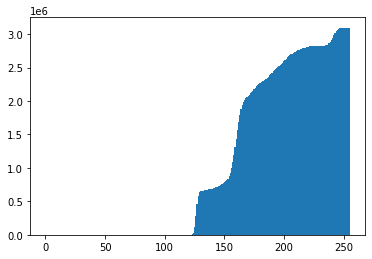

In [237]:
#Histogramme cumulé image 2
plt.hist(im1.ravel(), bins = 256, cumulative= True)
plt.show()

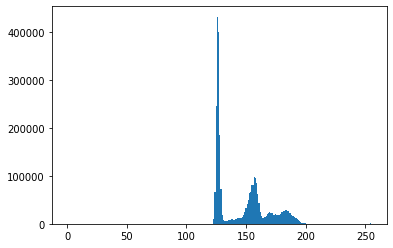

In [238]:
#histogramme normalisé image 3
plt.hist(im3.ravel(), bins = 256)
plt.show()

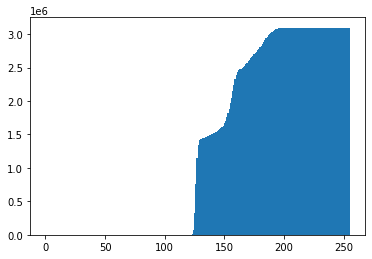

In [404]:
#Histogramme cumulé image 3
plt.hist(im3.ravel(), bins = 256, cumulative= True)
plt.show()

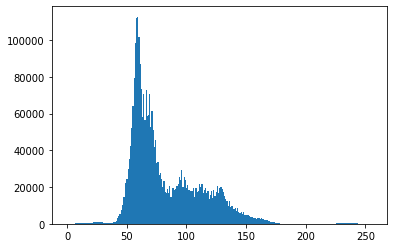

In [240]:
#histogramme normalisé image 4
plt.hist(im4.ravel(), bins = 256)
plt.show()

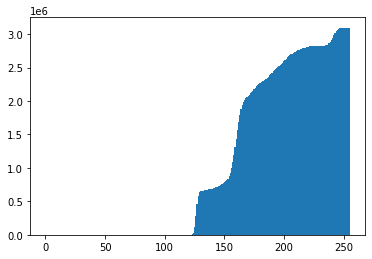

In [241]:
#Histogramme cumulé image 2
plt.hist(im1.ravel(), bins = 256, cumulative= True)
plt.show()

# Negative/ Inversion de la dynamique


Chaque niveau de gris est remplacé par son complémentaire
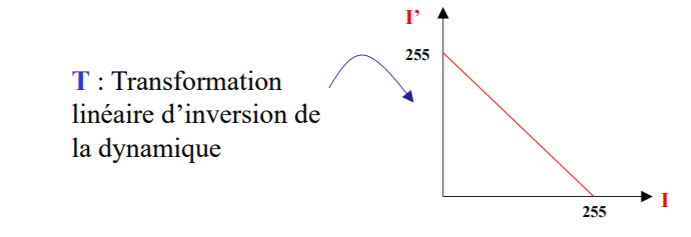


In [493]:
im1_pil = Image.open('1379.png')

In [494]:
im1_inv = ImageOps.invert(im1_pil)

In [495]:
im2_pil = Image.open('1380.png')
im2_inv = ImageOps.invert(im2_pil)


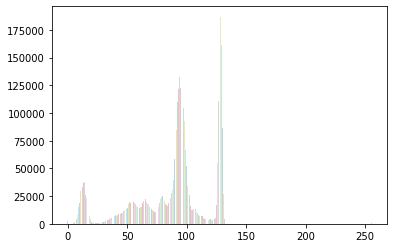

In [246]:
plt.figure(0)
l1 = im1_inv.histogram()
for i in range(0, 256):

    plt.bar(i, l1[i], alpha=0.3)
    
plt.show()

Histogramme de la négative de l'image 1 

(-0.5, 1513.5, 2043.5, -0.5)

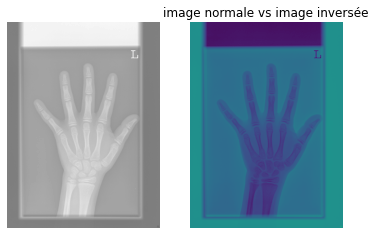

In [500]:
fig, axes = plt.subplots(1, 2)
plt.title('image normale vs image inversée')
axes[0].imshow(im1 , cmap='gray') 
axes[0].axis('off')
axes[1].imshow(im1_inv)
axes[1].axis('off')



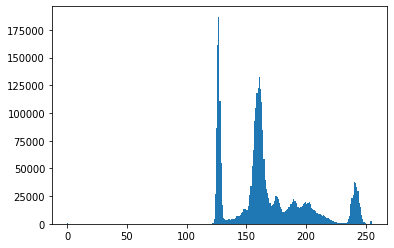

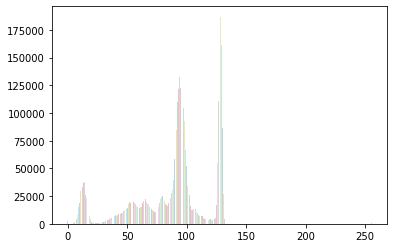

In [411]:
plt.hist(im1.ravel(), bins = 256)
plt.show()

plt.figure(0)
l1 = im1_inv.histogram()
for i in range(0, 256):

    plt.bar(i, l1[i], alpha=0.3)
    
plt.show()


On retouve bien l'inversion de la dynamique sur l'histogramme

In [501]:
#min max 

print("Image 1 max min")
print(im1.min())
print(im1.max())

print("Image 2 max min")
print(im2.min())
print(im2.max())

print("Image 3 max min")
print(im3.min())
print(im3.max())

print("Image 4 max min")
print(im4.min())
print(im4.max())

Image 1 max min
0
255
Image 2 max min
0
255
Image 3 max min
0
255
Image 4 max min
0
255


# Seuillage

La binarisation permet de transformer une image à niveaux de gris en
une image à deux niveaux de gris uniquement : noir (0) et blanc (255)



(-0.5, 1513.5, 2043.5, -0.5)

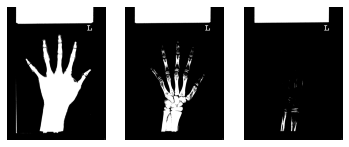

In [504]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(im1 >= 180, cmap='gray') 
axes[0].axis('off')
axes[1].imshow(im1 >= 200, cmap='gray')
axes[1].axis('off')
axes[2].imshow(im1 >= 220, cmap='gray')
axes[2].axis('off')



Comparaision en entre un seuil a 180, 200 et 220

<function matplotlib.pyplot.show(close=None, block=None)>

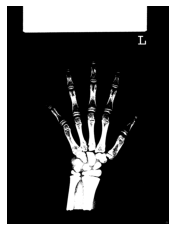

In [505]:

plt.imshow(im1 >= 200, cmap='gray')
plt.axis('off')
plt.show

In [262]:
imgCV1 = cv.imread("1379.png")

In [263]:
imgCV1

array([[[128, 128, 128],
        [127, 127, 127],
        [126, 126, 126],
        ...,
        [127, 127, 127],
        [128, 128, 128],
        [127, 127, 127]],

       [[128, 128, 128],
        [129, 129, 129],
        [126, 126, 126],
        ...,
        [127, 127, 127],
        [129, 129, 129],
        [128, 128, 128]],

       [[126, 126, 126],
        [129, 129, 129],
        [130, 130, 130],
        ...,
        [126, 126, 126],
        [129, 129, 129],
        [128, 128, 128]],

       ...,

       [[128, 128, 128],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [127, 127, 127],
        [129, 129, 129],
        [126, 126, 126]],

       [[129, 129, 129],
        [129, 129, 129],
        [129, 129, 129],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       [[130, 130, 130],
        [129, 129, 129],
        [130, 130, 130],
        ...,
        [129, 129, 129],
        [126, 126, 126],
        [128, 128, 128]]

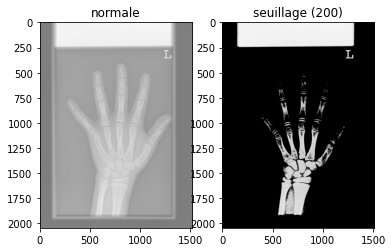

In [506]:
im1_seuil200 = np.where(im1 > 200, im1, 0)

fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
plt.title('normale')
ax1.imshow(im1, cmap = 'gray')

ax2 = fig.add_subplot(1, 2, 2)
plt.title('seuillage (200)')
ax2.imshow(im1_seuil200, cmap = 'gray')

plt.show()

# Filtrages

# Filtre passe bas

Test d'une fonction de filtrage passe bas

In [432]:


image1 = img.imread('grumpy_cat.jpg',as_gray=True)

#convert image to numpy array
image1_np=np.array(image1) 

#fft of image
fft1 = fftpack.fftshift(fftpack.fft2(image1_np))

#Create a low pass filter image
x,y = image1_np.shape[0],image1_np.shape[1]
#size of circle
e_x,e_y=50,50
#create a box 
bbox=((x/2)-(e_x/2),(y/2)-(e_y/2),(x/2)+(e_x/2),(y/2)+(e_y/2))

low_pass=Image.new("L",(image1_np.shape[0],image1_np.shape[1]),color=0)

i#mage2 = Image.open('1382.png')
draw1=ImageDraw.Draw(low_pass)
draw1.ellipse(bbox, fill=1)

low_pass_np=np.array(low_pass) 

#multiply both the images
filtered=np.multiply(fft1,low_pass_np)

#inverse fft
ifft2 = np.real(fftpack.ifft2(fftpack.ifftshift(filtered)))
ifft2 = np.maximum(0, np.minimum(ifft2, 255))

#Probleme non résolu!!

<function matplotlib.pyplot.show(close=None, block=None)>

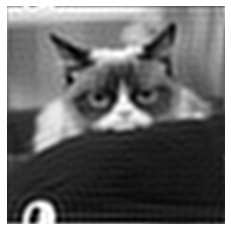

In [433]:
plt.imshow(ifft2, cmap='gray')
plt.axis('off')
plt.show

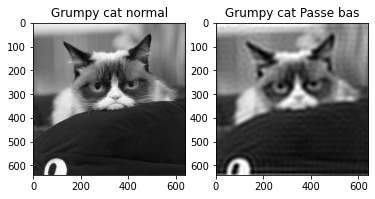

In [434]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
plt.title('Grumpy cat normal')
ax1.imshow(image1, cmap = 'gray')

ax2 = fig.add_subplot(1, 2, 2)
plt.title('Grumpy cat Passe bas')
ax2.imshow(ifft2, cmap = 'gray')

plt.show()

##### Exemples des problèmes de la fonction précédente 

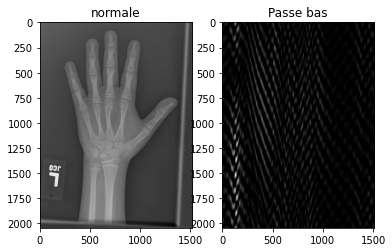

In [351]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
plt.title('normale')
ax1.imshow(image1, cmap = 'gray')

ax2 = fig.add_subplot(1, 2, 2)
plt.title('Passe bas')
ax2.imshow(ifft2, cmap = 'gray')

plt.show()

In [291]:
iimage1 = image1.reshape(1514,2044)
iimage1

Array([[104., 102., 103., ...,  82.,  84.,  88.],
       [ 86.,  84.,  83., ...,  76.,  75.,  81.],
       [ 79.,  79.,  79., ...,  98.,  97.,  93.],
       ...,
       [ 58.,  62.,  62., ...,  62.,  64.,  63.],
       [ 62.,  60.,  61., ...,  61.,  61.,  61.],
       [ 61.,  62.,  60., ...,  62.,  66.,  66.]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

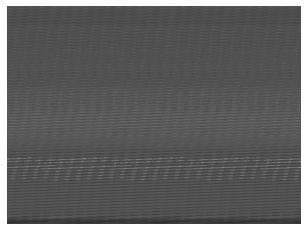

In [292]:
plt.imshow(iimage1, cmap='gray')
plt.axis('off')
plt.show

# Filtre moyenneur

In [366]:
moyenneur = [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9],[1/9, 1/9, 1/9]]
moyenneur5 = [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9],[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]
moyenneur7 = [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9],[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]

In [374]:
im1moy3 =  ndi.convolve(im1, moyenneur)
im4moy3 = ndi.convolve(im4, moyenneur)

im1moy5 =  ndi.convolve(im1, moyenneur5)
im4moy5 = ndi.convolve(im4, moyenneur5)

im1moy7 =  ndi.convolve(im1, moyenneur7)
im4moy7 = ndi.convolve(im4, moyenneur7)

<function matplotlib.pyplot.show(close=None, block=None)>

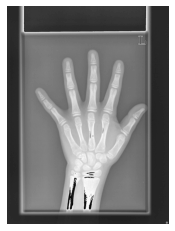

In [396]:
plt.imshow(im1moy7, cmap='gray')
plt.axis('off')
plt.show

Image 1 avec un filtre moyenneur 7

<function matplotlib.pyplot.show(close=None, block=None)>

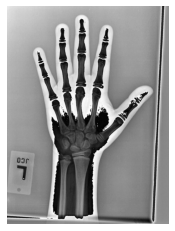

In [397]:
plt.imshow(im4moy7, cmap='gray')
plt.axis('off')
plt.show

Image 1 avec un filtre moyenneur 7

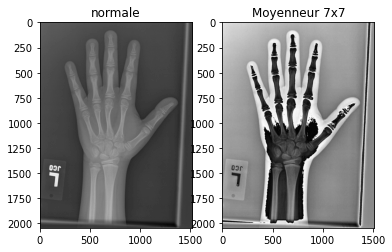

In [402]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
plt.title('normale')
ax1.imshow(im4, cmap = 'gray')

ax2 = fig.add_subplot(1, 2, 2)
plt.title('Moyenneur 7x7')
ax2.imshow(im4moy7, cmap = 'gray')



plt.show()

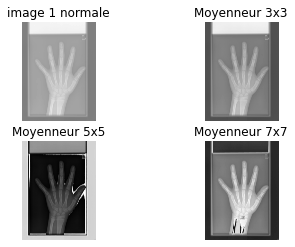

In [508]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title('image 1 normale')
plt.axis('off')
plt.imshow(im1, cmap = 'gray')

plt.subplot(2, 2, 2)
plt.title('Moyenneur 3x3')
plt.axis('off')
plt.imshow(im1moy3, cmap = 'gray')

plt.subplot(2, 2, 3)
plt.title('Moyenneur 5x5')
plt.axis('off')
plt.imshow(im1moy5, cmap = 'gray')

plt.subplot(2, 2, 4)
plt.title('Moyenneur 7x7')
plt.axis('off')
plt.imshow(im1moy7, cmap = 'gray')

plt.show()

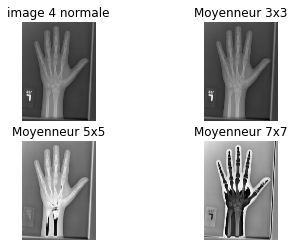

In [507]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title('image 4 normale')
plt.axis('off')
plt.imshow(im4, cmap = 'gray')

plt.subplot(2, 2, 2)
plt.title('Moyenneur 3x3')
plt.axis('off')
plt.imshow(im4moy3, cmap = 'gray')

plt.subplot(2, 2, 3)
plt.title('Moyenneur 5x5')
plt.axis('off')
plt.imshow(im4moy5, cmap = 'gray')

plt.subplot(2, 2, 4)
plt.title('Moyenneur 7x7')
plt.axis('off')
plt.imshow(im4moy7, cmap = 'gray')

plt.show()

# Gaussian filter

In [384]:

im4_gaus5 = ndi.gaussian_filter(im4, sigma=5)
im4_gaus10 = ndi.gaussian_filter(im4, sigma=10)
im4_gaus20 = ndi.gaussian_filter(im4, sigma=20)

<function matplotlib.pyplot.show(close=None, block=None)>

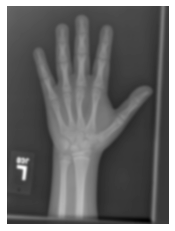

In [386]:
plt.imshow(im4_gaus10, cmap='gray')
plt.axis('off')
plt.show

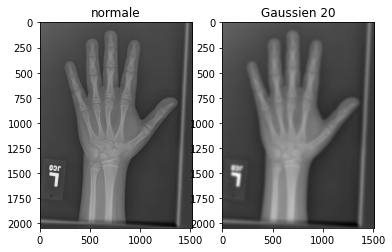

In [482]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
plt.title('normale')
ax1.imshow(im4, cmap = 'gray')

ax2 = fig.add_subplot(1, 2, 2)
plt.title('Gaussien 20')
ax2.imshow(im4_gaus10, cmap = 'gray')



plt.show()

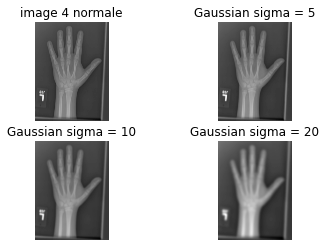

In [509]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title('image 4 normale')
plt.axis('off')
plt.imshow(im4, cmap = 'gray')

plt.subplot(2, 2, 2)
plt.title('Gaussian sigma = 5')
plt.axis('off')
plt.imshow(im4_gaus5, cmap = 'gray')

plt.subplot(2, 2, 3)
plt.title('Gaussian sigma = 10')
plt.axis('off')
plt.imshow(im4_gaus10, cmap = 'gray')

plt.subplot(2, 2, 4)
plt.title('Gaussian sigma = 20')
plt.axis('off')
plt.imshow(im4_gaus20, cmap = 'gray')

plt.show()

# Filtre Laplace

In [417]:
im4_Laplace = ndi.laplace(im4)

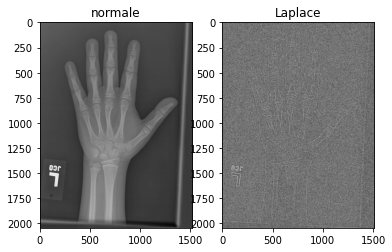

In [418]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
plt.title('normale')
ax1.imshow(im4, cmap = 'gray')

ax2 = fig.add_subplot(1, 2, 2)
plt.title('Laplace')
ax2.imshow(im4_Laplace, cmap = 'gray')



plt.show()

# Gaussian + Seuillage

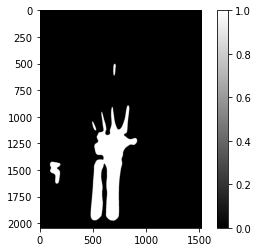

In [484]:

# Draw the image in color
plt.imshow(im4_gaus >= 130, cmap='gray')
plt.colorbar()



# Filtre de Sobel

In [425]:
Sobel = [[ 1, 2, 1],
 [ 0, 0, 0],
 [-1, -2, -1]]


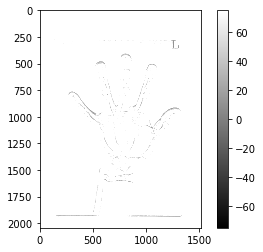

In [485]:
im4_sobel = ndi.convolve(im1, Sobel)
# Draw the image in color
plt.imshow(im4_sobel, cmap='gray', vmin=-75, vmax=75)
plt.colorbar()

# Filtre passe-haut : Sharpening

In [438]:
im1_pil

sharpened1 = im1_pil.filter(ImageFilter.SHARPEN)
sharpened1.show()

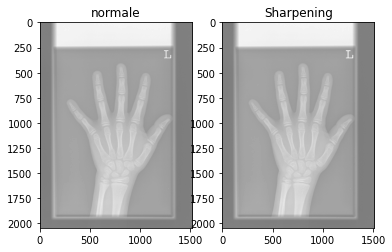

In [439]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
plt.title('normale')
ax1.imshow(im1, cmap = 'gray')

ax2 = fig.add_subplot(1, 2, 2)
plt.title('Sharpening')
ax2.imshow(sharpened1, cmap = 'gray')



plt.show()

In [440]:
sharpened2 = sharpened1.filter(ImageFilter.SHARPEN)

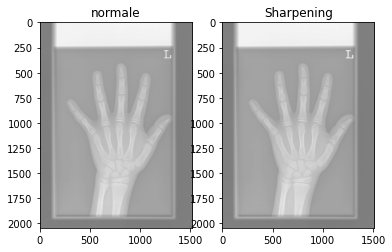

In [441]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
plt.title('normale')
ax1.imshow(im1, cmap = 'gray')

ax2 = fig.add_subplot(1, 2, 2)
plt.title('Sharpening')
ax2.imshow(sharpened2, cmap = 'gray')



plt.show()

In [442]:
im4_pil = Image.open('1382.png')

sharpened_im4 = im4_pil.filter(ImageFilter.SHARPEN)

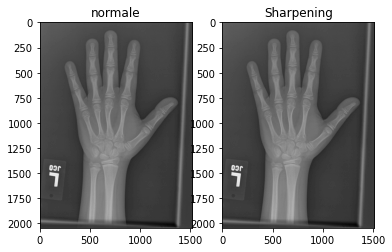

In [443]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
plt.title('normale')
ax1.imshow(im4, cmap = 'gray')

ax2 = fig.add_subplot(1, 2, 2)
plt.title('Sharpening')
ax2.imshow(sharpened_im4, cmap = 'gray')



plt.show()

In [444]:
sharpened2_im4= sharpened_im4.filter(ImageFilter.SHARPEN)

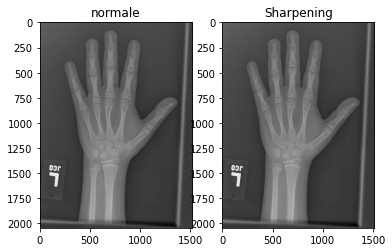

In [445]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
plt.title('normale')
ax1.imshow(im4, cmap = 'gray')

ax2 = fig.add_subplot(1, 2, 2)
plt.title('Sharpening')
ax2.imshow(sharpened2_im4, cmap = 'gray')



plt.show()

Pas de différence notable observée

# Kmeans

In [469]:
from sklearn import cluster 
from skimage.color import rgb2gray
import skimage.io

In [510]:
image_gray= im4.reshape(im4.shape[0] * im4.shape[1], 1)
grayscale = rgb2gray(im4)
n=4
kmeans = cluster.KMeans(n_clusters= n)
kmeans.fit(image_gray)

KMeans(n_clusters=4)

In [475]:
clustered= kmeans.cluster_centers_[kmeans.labels_]


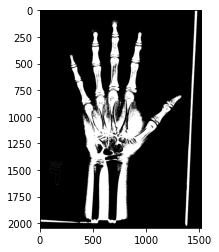

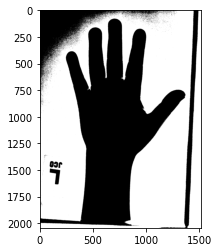

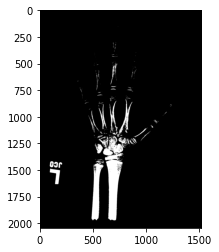

In [477]:
labels = kmeans.labels_
for n in range(n):
    image_cluster = []
    for i in range(len(labels)):
        if(labels[i]) == n:
            image_cluster.append(float(clustered[i]))
        else:
            image_cluster.append(1)
    if(n==1):
        image_fix= np.array(image_cluster).reshape(grayscale.shape)
    reshape_clustered = np.array(image_cluster).reshape(grayscale.shape)
    plt.imshow(reshape_clustered, cmap=plt.get_cmap("gray"))
    plt.show()

Pas de conclusion 